In [89]:
from matplotlib import rc
%matplotlib inline
from matplotlib import font_manager
f_path = "/content/drive/MyDrive/Colab/MALGUNSL.TTF"
font_manager.FontProperties(fname=f_path).get_name()
rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False                 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install Konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 353 kB/s 
     |████████████████████████████████| 453 kB 65.1 MB/s 


In [ ]:
import urllib
import datetime
import json

In [165]:
def getPostData(post, jsonResult, cnt):
    title = post['title']
    description = post['description']
    org_link = post['originallink']
    link = post['link']
    pDate = datetime.datetime.strptime(post['pubDate'],'%a, %d %b %Y %H:%M:%S +0900' )
    pDate = pDate.strftime('%Y-%m-%d %H:%M:%S') 
    jsonResult.append({
                'cnt':cnt, 'title':title, 'description':description
                ,'org_link':org_link, 'link':link, 'pDate':pDate
        })
    return

def getNaverSearch(node,srcText, start, display):
    base = "https://openapi.naver.com/v1/search"
    node = "/" + node + ".json"
    parameters = f"?query={urllib.parse.quote(srcText)}&start={start}&display={display}&startDate=2020-06-01&endDate=2020-07-30"
    url = base + node + parameters
    responseDecode = getRequestUrl(url)
    if(responseDecode == None):
        return None
    else:
        return json.loads(responseDecode)
    
def getRequestUrl(url):
    req = urllib.request.Request(url)
    req.add_header("X-Naver-Client-Id",'nUh0vBVNekTinKV826d_')
    req.add_header("X-Naver-Client-Secret",'HVD5Up28ht')
    try:
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            print(f"{datetime.datetime.now} url request success")
            return response.read().decode('utf-8')
    except Exception as e:
        print(e)
        print(f"{datetime.datetime.now} error for url : {url}")
    
def main():
    node = 'news' # target
    srcText = input('검색어를 입력하세요')
    cnt = 0
    jsonResult = []
    jsonResponse = getNaverSearch(node, srcText, 1, 100) # start=1, display=100
    total = jsonResponse['total']
    while( (jsonResponse != None) and (jsonResponse['display'] != 0) ):
        for post in jsonResponse['items']:
            cnt += 1
            getPostData(post,jsonResult,cnt)
        start = jsonResponse['start'] + jsonResponse['display']
        jsonResponse = getNaverSearch(node, srcText, start, 100)
    filename = 'crawling_api_result.json'
    with open(filename, 'w', encoding='utf-8') as f:
        jsonFile = json.dumps(jsonResult, indent=4, sort_keys=True, ensure_ascii=False)
        f.write(jsonFile)
    print(f'전체 검색: {total}건')
    print(f'가져온 데이터: {cnt}건')         
        

In [166]:
main()

검색어를 입력하세요코로나
<built-in method now of type object at 0xa583a0> url request success
<built-in method now of type object at 0xa583a0> url request success
<built-in method now of type object at 0xa583a0> url request success
<built-in method now of type object at 0xa583a0> url request success
<built-in method now of type object at 0xa583a0> url request success
<built-in method now of type object at 0xa583a0> url request success
<built-in method now of type object at 0xa583a0> url request success
<built-in method now of type object at 0xa583a0> url request success
<built-in method now of type object at 0xa583a0> url request success
<built-in method now of type object at 0xa583a0> url request success
HTTP Error 400: Bad Request
<built-in method now of type object at 0xa583a0> error for url : https://openapi.naver.com/v1/search/news.json?query=%EC%BD%94%EB%A1%9C%EB%82%98&start=1001&display=100&startDate=2020-06-01&endDate=2020-07-30
전체 검색: 11486717건
가져온 데이터: 1000건


In [168]:
with open('/content/crawling_api_result.json') as f:

    raw = json.load(f)

In [169]:
data = pd.DataFrame(raw)

In [170]:
import re
import pandas as pd

In [171]:
title = [re.sub(r"[^\uAC00-\uD7A30-9·.↓]".strip(), " ", data['title'][i]) for i in range(1000)]


In [172]:
# title = [' '.join(title[i].split()) for i in range(1000)]
data['title'] = title

In [173]:
data

cnt                                        description  \
0       1  <b>코로나</b>19 여파로 3년 만에 오프라인으로 열린 이날 행사에서 이목을 사...   
1       2  야맥축제는 전국 각지에서 생산한 수제맥주와 야시장 먹거리, 다양한 공연과 이벤트를 ...   
2       3  <b>코로나</b>19 이후 3년 만에 대면으로 열리는 이번 한마대동제는 건전한 축...   
3       4  예심 당일 낮 12시부터 오후 1시까지 서구문화회관에서도 현장 접수한다류한국 서구청...   
4       5  문인환 시 문화관광국장은 &quot;<b>코로나</b>19로 침체된 원도심 상권을 ...   
..    ...                                                ...   
995   996  이번 조치는 <b>코로나</b>19 장기화로 어려움이 가중된 폐업 소상공인의 채무부...   
996   997  광주 서구가 신종 <b>코로나</b>바이러스 감염증(<b>코로나</b>19) 장기화...   
997   998  다만 특정 직역만을 위한 법안 제정보다는 보건의료인력지원법 개정으로 <b>코로나</...   
998   999  있다&quot;며 &quot;동인천2지구도 성공적으로 진행될 수 있도록 구민 여러분...   
999  1000  특히, <b>코로나</b>19로 인한 사회적 거리두기 해제에 따라 경영진과 고객패널...   

                                                  link  \
0    https://n.news.naver.com/mnews/article/081/000...   
1    https://www.cnbnews.com/news/article.html?no=5...   
2    https://www.cnbnews.com/news/article.html?no=5...   
3    https://www.yeongnam.com/web/view.php?key=2022...   
4    http://www.newsfreezone.co.kr/news/articleView...   
..                                                 ...   
995           http://www.mediapen.com/news/view/759505   
996  https://n.news.naver.com/mnews/article/421/000...   
997  http://www.docdocdoc.co.kr/news/articleView.ht...   
998  http://www.joongboo.com/news/articleView.html?...   
999  https://www.viva100.com/main/view.php?key=2022...   

                                              org_link                pDate  \
0    https://www.seoul.co.kr/news/newsView.php?id=2...  2022-10-04 16:20:00   
1    https://www.cnbnews.com/news/article.html?no=5...  2022-10-04 16:20:00   
2    https://www.cnbnews.com/news/article.html?no=5...  2022-10-04 16:20:00   
3    https://www.yeongnam.com/web/view.php?key=2022...  2022-10-04 16:20:00   
4    http://www.newsfreezone.co.kr/news/articleView...  2022-10-04 16:20:00   
..                                                 ...                  ...   
995           http://www.mediapen.com/news/view/759505  2022-10-04 14:34:00   
996              https://www.news1.kr/articles/4821985  2022-10-04 14:34:00   
997  http://www.docdocdoc.co.kr/news/articleView.ht...  2022-10-04 14:34:00   
998  http://www.joongboo.com/news/articleView.html?...  2022-10-04 14:34:00   
999  https://www.viva100.com/main/view.php?key=2022...  2022-10-04 14:34:00   

                                                 title  
0      삼성전자  2027년 1.4나노 공정 도입  기술 초격차로  이재용 반도체 비전...  
1    수제맥주 마니아들의 오랜 기다림은 이제 끝... 오산시       야맥축제     ...  
2                           경남대   개교 76주년 기념 한마대동제  개최  
3      국내 최장수 프로그램           전국노래자랑       서구 이현공원에서 녹화  
4                     대전 0시 뮤직페스티벌  7일       팡파르        
..                                                 ...  
995               신보        폐업 소상공인 부실유보 조치       유지키로  
996                    광주 서구  소상공인에 최대 2000만원까지 무담보 대출  
997             국감 앞두고       간호법 제정 반대       시위 재개한 의협  
998        원활한 도시재생을 위해        인천 동구        동인천2지구 ...  
999            증권  4분기       소비자보호의 날       고객패널 조사 실시  

[1000 rows x 6 columns]

In [143]:
description = [re.sub(r"[^\uAC00-\uD7A30-9·.↓]".strip(), " ", data['description'][i]) for i in range(1000)]
description = [' '.join(description[i].split()) for i in range(1000)]
data['description'] = description


In [144]:
data.drop(columns='org_link', inplace=True)

In [145]:
data.drop(columns='cnt', inplace=True)

In [146]:
data

description  \
0    이날 유가 증권시장에서 코스피지수는 전 거래일보다 53.89포인트 2.50 오른 2...   
1    민주당 시당은 4일 오후 2시 시당 대회의실에서 윤석열 정권 외교참사와 정치 탄압 ...   
2    외국인투자자들은 유가 증권시장에서 2180억원 순매수를 기록했다. 개인투자자는 20...   
3    각 지자체는 복지관 어린이집 운수회사 등을 돕기 위해 운영보조금 유가 보조금 등 각...   
4    유가 증권시장에서 외국인이 2180억원 순매수하며 지수 상승을 이끌었고 개인과 기관...   
..                                                 ...   
995  유가 증권시장에서 개인은 2814억원 순매도했고 외국인들은 1693억원 순매수했다....   
996  유가 상승과 맞물려 일본 국민은 수입물가 상승을 경험하면서 불만이 가중되고 있다. ...   
997  김영주 의원 열린뉴스통신 최근 고물가·고 유가 ·고환율 상황에 전기·가스요금 등 공...   
998  이날 유가 증권시장에서 네이버는 전 거래일 대비 1.53 내린 19만3500원에 거...   
999  취득방법은 유가 증권 시장을 통한 장내매수다. 네트웍스우 주가는 전 거래일 대비 2...   

                                                  link                pDate  \
0           http://www.viewsnnews.com/article?q=205323  2022-10-04 16:18:00   
1    https://n.news.naver.com/mnews/article/079/000...  2022-10-04 16:18:00   
2    http://www.g-enews.com/ko-kr/news/article/news...  2022-10-04 16:16:00   
3       http://www.idaegu.com/newsView/idg202210040039  2022-10-04 16:16:00   
4    https://www.viva100.com/main/view.php?key=2022...  2022-10-04 16:16:00   
..                                                 ...                  ...   
995  http://www.pinpointnews.co.kr/news/articleView...  2022-09-30 16:34:00   
996  http://weekly.hankooki.com/news/articleView.ht...  2022-09-30 16:32:00   
997  https://www.onews.tv/news/articleView.html?idx...  2022-09-30 16:30:00   
998  https://n.news.naver.com/mnews/article/029/000...  2022-09-30 16:30:00   
999  http://www.pinpointnews.co.kr/news/articleView...  2022-09-30 16:30:00   

                                                 title  
0                   한국 주가도 동반급등....외국인  삼성전자 사고 네이버 투매  
1         민주당 광주광역시당  정치탄압·외교 참사 윤석열 정권       규탄        
2                            종합  뉴욕증시 훈풍에 코스피 2200선 회복  
3                      지방자치단체 지방보조금 부정수급액 환수  대구·경북 저조  
4                             코스피  2.5  상승 마감 2200대 회복  
..                                                 ...  
995  삼성전자   하이닉스 카카오 ...   화학 현대차 삼성          휘청        
996                  뉴스의 창  위기의 기시다 총리...아베 국장 결국 독 되나  
997  김영주 의원       전기·가스요금 인상 서민 부담 가중 정부 부가세 감면 동참해...  
998                        네이버  19만원도 깨지나 52주 신저가 또 경신  
999         상한가 종목  미래아이앤지·  네트웍스우·  ·오성첨단소재·엔젠바이오·...  

[1000 rows x 4 columns]

In [147]:
data.to_csv('Gas_Station_News.csv')

In [148]:
data[data['title'].duplicated()]
data.drop(index=[])

description  \
0    이날 유가 증권시장에서 코스피지수는 전 거래일보다 53.89포인트 2.50 오른 2...   
1    민주당 시당은 4일 오후 2시 시당 대회의실에서 윤석열 정권 외교참사와 정치 탄압 ...   
2    외국인투자자들은 유가 증권시장에서 2180억원 순매수를 기록했다. 개인투자자는 20...   
3    각 지자체는 복지관 어린이집 운수회사 등을 돕기 위해 운영보조금 유가 보조금 등 각...   
4    유가 증권시장에서 외국인이 2180억원 순매수하며 지수 상승을 이끌었고 개인과 기관...   
..                                                 ...   
995  유가 증권시장에서 개인은 2814억원 순매도했고 외국인들은 1693억원 순매수했다....   
996  유가 상승과 맞물려 일본 국민은 수입물가 상승을 경험하면서 불만이 가중되고 있다. ...   
997  김영주 의원 열린뉴스통신 최근 고물가·고 유가 ·고환율 상황에 전기·가스요금 등 공...   
998  이날 유가 증권시장에서 네이버는 전 거래일 대비 1.53 내린 19만3500원에 거...   
999  취득방법은 유가 증권 시장을 통한 장내매수다. 네트웍스우 주가는 전 거래일 대비 2...   

                                                  link                pDate  \
0           http://www.viewsnnews.com/article?q=205323  2022-10-04 16:18:00   
1    https://n.news.naver.com/mnews/article/079/000...  2022-10-04 16:18:00   
2    http://www.g-enews.com/ko-kr/news/article/news...  2022-10-04 16:16:00   
3       http://www.idaegu.com/newsView/idg202210040039  2022-10-04 16:16:00   
4    https://www.viva100.com/main/view.php?key=2022...  2022-10-04 16:16:00   
..                                                 ...                  ...   
995  http://www.pinpointnews.co.kr/news/articleView...  2022-09-30 16:34:00   
996  http://weekly.hankooki.com/news/articleView.ht...  2022-09-30 16:32:00   
997  https://www.onews.tv/news/articleView.html?idx...  2022-09-30 16:30:00   
998  https://n.news.naver.com/mnews/article/029/000...  2022-09-30 16:30:00   
999  http://www.pinpointnews.co.kr/news/articleView...  2022-09-30 16:30:00   

                                                 title  
0                   한국 주가도 동반급등....외국인  삼성전자 사고 네이버 투매  
1         민주당 광주광역시당  정치탄압·외교 참사 윤석열 정권       규탄        
2                            종합  뉴욕증시 훈풍에 코스피 2200선 회복  
3                      지방자치단체 지방보조금 부정수급액 환수  대구·경북 저조  
4                             코스피  2.5  상승 마감 2200대 회복  
..                                                 ...  
995  삼성전자   하이닉스 카카오 ...   화학 현대차 삼성          휘청        
996                  뉴스의 창  위기의 기시다 총리...아베 국장 결국 독 되나  
997  김영주 의원       전기·가스요금 인상 서민 부담 가중 정부 부가세 감면 동참해...  
998                        네이버  19만원도 깨지나 52주 신저가 또 경신  
999         상한가 종목  미래아이앤지·  네트웍스우·  ·오성첨단소재·엔젠바이오·...  

[1000 rows x 4 columns]

In [149]:
import nltk
from nltk.tokenize import word_tokenize # 자연어 처리 패키지 (단어 토큰화)
from nltk.corpus import stopwords # 불용어 정보 제공
from nltk.stem import WordNetLemmatizer # 단어의 형태를 일반화 시켜 표제어 추출
from collections import Counter
from wordcloud import STOPWORDS, WordCloud

In [150]:
nltk.download('stopwords') # nltk 제공 불용어 다운로드
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
lemma = WordNetLemmatizer() # 표제어 추출

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [151]:
words = [ ]
for i in data['title']:
    engWords = re.sub(r"[^\uAC00-\uD7A30-9]+", " ", str(i))
    engWordsToken = word_tokenize(engWords)
    engWordsTokenStop = [j for j in engWordsToken]
    engWordsTokenStopLemma = [lemma.lemmatize(j) for j in engWordsTokenStop]
    words.append(engWordsTokenStopLemma)
words

[['한국', '주가도', '동반급등', '외국인', '삼성전자', '사고', '네이버', '투매'],
 ['민주당', '광주광역시당', '정치탄압', '외교', '참사', '윤석열', '정권', '규탄'],
 ['종합', '뉴욕증시', '훈풍에', '코스피', '2200선', '회복'],
 ['지방자치단체', '지방보조금', '부정수급액', '환수', '대구', '경북', '저조'],
 ['코스피', '2', '5', '상승', '마감', '2200대', '회복'],
 ['감산', '훈풍에', '유가', '100불', '전망', '정유주', '급등'],
 ['특징주', '삼성전자', '반도체주', '강세에', '4', '반등', '인수', '기대감', '종합'],
 ['거래소', '상장폐지', '더', '신중하게', '장기', '거래정지', '우려도', '종합'],
 ['특징주', '정유주', '산유국', '대규모', '감산', '기대에', '강세', '종합'],
 ['업황', '부진에', '무너진', '증권', '연이은', '자사주', '매입', '효과', '볼까'],
 ['맥스퀘어', '상장', '추진', '준비작업', '박차'],
 ['마감시황', '코스피', '외국인', '매수', '에', '2', '5', '2200선', '회복'],
 ['단숨에', '2200선', '회복한', '코스피', '죽은', '고양이', '반등'],
 ['경기둔화', '우려에', '유연탄', '가격', '하락'],
 ['마감', '시황', '코스피', '2200선', '회복', '삼전', '하닉', '3', '대', '반등'],
 ['외인', '매수에', '코스피', '2', '200선', '회복', '코스닥도', '3', '대', '상승', '종합'],
 ['코스피', '2', '대', '상승', '장중', '2', '200', '회복'],
 ['특징주', '네이버', '8', '8', '급락', '17만원선으로', '밀려'],
 ['코스피', '2', '50', '오른'

In [152]:
from functools import reduce


reduce

<function _functools.reduce>

In [153]:
wordslist = reduce(lambda x,y : x+y, words)

In [154]:
cnt = Counter(wordslist)
cnt.most_common(50)

[('유가', 142),
 ('감산', 108),
 ('2', 90),
 ('휘발유', 84),
 ('국제', 80),
 ('코스피', 78),
 ('상승', 58),
 ('급등', 52),
 ('1', 52),
 ('뉴욕증시', 51),
 ('5', 50),
 ('하락', 50),
 ('9월', 47),
 ('대규모', 42),
 ('기름값', 38),
 ('10월', 38),
 ('경유', 38),
 ('대', 37),
 ('가격', 34),
 ('기업', 34),
 ('국내', 33),
 ('하락세', 33),
 ('증시', 32),
 ('공매도', 31),
 ('회복', 30),
 ('연속', 30),
 ('삼성전자', 27),
 ('3', 26),
 ('지원', 26),
 ('전망', 25),
 ('등', 25),
 ('만에', 24),
 ('미국', 24),
 ('6', 24),
 ('100대', 24),
 ('사내유보금', 24),
 ('내림세', 24),
 ('돌파', 23),
 ('특징주', 22),
 ('산유국', 22),
 ('2200선', 21),
 ('인상', 21),
 ('18', 21),
 ('하루', 21),
 ('물가', 21),
 ('마감', 20),
 ('이상', 20),
 ('지속', 20),
 ('26', 20),
 ('7원', 20)]

In [155]:
wordscnt = dict()
for tag, counts in cnt.most_common(50):
    if(len(str(tag)) > 1):      # 1글자 이상인 단어만 추출
        wordscnt[tag] = counts

wordscnt

{'유가': 142,
 '감산': 108,
 '휘발유': 84,
 '국제': 80,
 '코스피': 78,
 '상승': 58,
 '급등': 52,
 '뉴욕증시': 51,
 '하락': 50,
 '9월': 47,
 '대규모': 42,
 '기름값': 38,
 '10월': 38,
 '경유': 38,
 '가격': 34,
 '기업': 34,
 '국내': 33,
 '하락세': 33,
 '증시': 32,
 '공매도': 31,
 '회복': 30,
 '연속': 30,
 '삼성전자': 27,
 '지원': 26,
 '전망': 25,
 '만에': 24,
 '미국': 24,
 '100대': 24,
 '사내유보금': 24,
 '내림세': 24,
 '돌파': 23,
 '특징주': 22,
 '산유국': 22,
 '2200선': 21,
 '인상': 21,
 '18': 21,
 '하루': 21,
 '물가': 21,
 '마감': 20,
 '이상': 20,
 '지속': 20,
 '26': 20,
 '7원': 20}

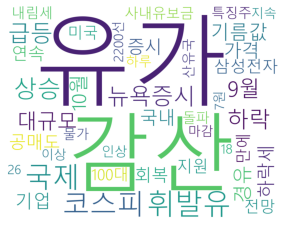

In [156]:
wc = WordCloud(f_path, stopwords=stopwords, width=1000, height=800,background_color='white')
cloud = wc.generate_from_frequencies(wordscnt)

plt.imshow(cloud)
plt.axis('off')
plt.show()